<a href="https://colab.research.google.com/github/limeng1011/spacemissionsanalysis/blob/main/SpaceMissionsAnalysis050722.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 7.7 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
df_data = pd.read_csv('mission_launches.csv')

In [ ]:
df_data.info()
df_data[df_data['Organisation']=='SpaceX']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
8,8,8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success
17,17,17,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Tue Jun 30, 2020 20:10 UTC",Falcon 9 Block 5 | GPS III SV03,StatusActive,50.0,Success
20,20,20,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Sat Jun 13, 2020 09:21 UTC",Falcon 9 Block 5 | Starlink V1 L8 & SkySat 16 ...,StatusActive,50.0,Success
...,...,...,...,...,...,...,...,...,...
763,763,763,SpaceX,"Omelek Island, Ronald Reagan Ballistic Missile...","Tue Jul 14, 2009 03:35 UTC",Falcon 1 | RazakSat,StatusRetired,7.0,Success
800,800,800,SpaceX,"Omelek Island, Ronald Reagan Ballistic Missile...","Sun Sep 28, 2008 23:15 UTC",Falcon 1 | RatSat,StatusRetired,7.0,Success
808,808,808,SpaceX,"Omelek Island, Ronald Reagan Ballistic Missile...","Sun Aug 03, 2008 03:34 UTC",Falcon 1 | Flight 3,StatusRetired,7.0,Failure
879,879,879,SpaceX,"Omelek Island, Ronald Reagan Ballistic Missile...","Wed Mar 21, 2007 01:10 UTC",Falcon 1 | DemoSat,StatusRetired,7.0,Failure


# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
print(f'The dataframe has {df_data.shape[0]} rows and {df_data.shape[1]} columns.')
print(f'The column names are {df_data.columns}.')
df_data.head()

The dataframe has 4324 rows and 9 columns.
The column names are Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object').


,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [ ]:
print(f'Does the dataframe has NaN values? {df_data.isna().values.any()}.')
print(f'Does the dataframe has duplicated values? {df_data.duplicated().values.any()}.')

Does the dataframe has NaN values? True.
Does the dataframe has duplicated values? False.


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [ ]:
clean_df = df_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [ ]:
clean_df[clean_df['Organisation']=='SpaceX']

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",Falcon 9 Block 5 | ANASIS-II,StatusActive,50.0,Success
17,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Tue Jun 30, 2020 20:10 UTC",Falcon 9 Block 5 | GPS III SV03,StatusActive,50.0,Success
20,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Sat Jun 13, 2020 09:21 UTC",Falcon 9 Block 5 | Starlink V1 L8 & SkySat 16 ...,StatusActive,50.0,Success
...,...,...,...,...,...,...,...
763,SpaceX,"Omelek Island, Ronald Reagan Ballistic Missile...","Tue Jul 14, 2009 03:35 UTC",Falcon 1 | RazakSat,StatusRetired,7.0,Success
800,SpaceX,"Omelek Island, Ronald Reagan Ballistic Missile...","Sun Sep 28, 2008 23:15 UTC",Falcon 1 | RatSat,StatusRetired,7.0,Success
808,SpaceX,"Omelek Island, Ronald Reagan Ballistic Missile...","Sun Aug 03, 2008 03:34 UTC",Falcon 1 | Flight 3,StatusRetired,7.0,Failure
879,SpaceX,"Omelek Island, Ronald Reagan Ballistic Missile...","Wed Mar 21, 2007 01:10 UTC",Falcon 1 | DemoSat,StatusRetired,7.0,Failure


## Descriptive Statistics

In [ ]:
clean_df.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
num_launches_company = clean_df['Organisation'].value_counts()

In [ ]:
bar = px.bar(x=num_launches_company.index, 
             y=num_launches_company.values,
             color=num_launches_company.values,
             title='Number of Launches by Organisation')
bar.update_layout(xaxis_title='Organisation',
                  yaxis_title='Number of Launches',
                  coloraxis_showscale=False)
bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [ ]:
rocket_status = clean_df['Rocket_Status'].value_counts()

In [ ]:
rocket_status

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

In [ ]:
bar2 = px.bar(x=['Retired', 'Active'],
              y=rocket_status.values,
              color=rocket_status.values,
              title='What is the status of the rockets?')
bar2.update_layout(xaxis_title='Status of the Rocket',
                   yaxis_title='Number',
                   coloraxis_showscale=False)
bar2.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
success_or_fail = clean_df['Mission_Status'].value_counts()

In [ ]:
success_or_fail

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [ ]:
bar3 = px.bar(x=success_or_fail.index,
              y=success_or_fail.values,
              color=success_or_fail.values,
              title='Are the missions successful or failed?')
bar3.update_layout(xaxis_title='Successful or Failed',
                   yaxis_title='Count',
                   coloraxis_showscale=False)
bar3.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

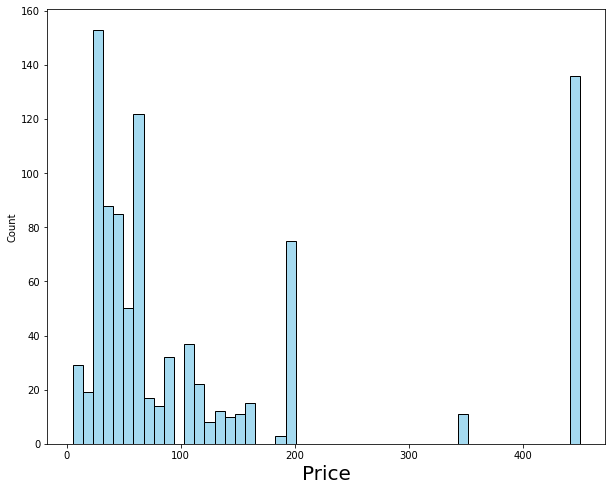

In [ ]:
clean_df['Price'] = pd.to_numeric(clean_df['Price'], errors='coerce')
plt.figure(figsize=(10,8))
plt.xlabel('Price', fontsize=20)
sns.histplot(clean_df['Price'],
             bins=50,
             color='skyblue'
             )
plt.show()

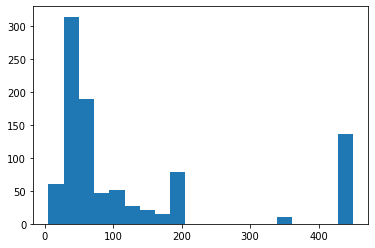

In [ ]:
plt.hist(clean_df['Price'],bins=20)
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
location_df = pd.DataFrame(clean_df['Location'].astype('str').str.rsplit(', ',n=1, expand=True))
country_df = pd.DataFrame(location_df[1].rename('Country'))
country_df

,Country
0,USA
1,China
2,USA
3,Kazakhstan
4,USA
...,...
4319,USA
4320,USA
4321,USA
4322,Kazakhstan


In [ ]:
country_df['Country'] = country_df['Country'].replace('Russia', 'Russian Federation')
country_df['Country'] = country_df['Country'].replace('New Mexico', 'USA')
country_df['Country'] = country_df['Country'].replace('Yellow Sea', 'China')
country_df['Country'] = country_df['Country'].replace('Shahrud Missile Test Site', 'Iran')
country_df['Country'] = country_df['Country'].replace('Pacific Missile Range Facility', 'USA')
country_df['Country'] = country_df['Country'].replace('Barents Sea', 'Russian Federation')
country_df['Country'] = country_df['Country'].replace('Gran Canaria', 'USA')
country_df['Country'] = country_df['Country'].replace('Iran', 'Iran, Islamic Republic of')
country_df['Country'] = country_df['Country'].replace('North Korea', "Korea, Democratic People's Republic of")
country_df['Country'] = country_df['Country'].replace('Pacific Ocean', 'Russian Federation')
country_df['Country'] = country_df['Country'].replace('South Korea', 'Korea, Republic of')
country_df['Country'].value_counts()

Russian Federation                        1434
USA                                       1351
Kazakhstan                                 701
France                                     303
China                                      269
Japan                                      126
India                                       76
Iran, Islamic Republic of                   14
New Zealand                                 13
Israel                                      11
Kenya                                        9
Australia                                    6
Korea, Democratic People's Republic of       5
Korea, Republic of                           3
Brazil                                       3
Name: Country, dtype: int64

In [ ]:
country_df['Country_Code'] = country_df['Country']
country_df

,Country,Country_Code
0,USA,USA
1,China,China
2,USA,USA
3,Kazakhstan,Kazakhstan
4,USA,USA
...,...,...
4319,USA,USA
4320,USA,USA
4321,USA,USA
4322,Kazakhstan,Kazakhstan


In [ ]:
for index, value in country_df['Country'].items():
  country_df['Country_Code'][index] = countries.get(value).alpha3

In [ ]:
country_df

,Country,Country_Code
0,USA,USA
1,China,CHN
2,USA,USA
3,Kazakhstan,KAZ
4,USA,USA
...,...,...
4319,USA,USA
4320,USA,USA
4321,USA,USA
4322,Kazakhstan,KAZ


In [ ]:
new_df = pd.concat([clean_df, country_df], axis=1)
new_df

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_Code
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA
...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,KAZ


In [ ]:
country_launch = new_df['Country_Code'].value_counts()

In [ ]:
world_map = px.choropleth(country_launch,
                          locations = country_launch.index,
                          color = country_launch.values,
                          
                          color_continuous_scale = px.colors.sequential.matter)
world_map.show()

In [ ]:
country_launch2 = new_df.groupby(['Country_Code', 'Country'], as_index=False).agg({'Detail':pd.Series.count})
world_map2 = px.choropleth(country_launch2,
                           locations = 'Country_Code',
                           hover_name = 'Country',
                           color = 'Detail',
                           color_continuous_scale = px.colors.sequential.matter)
world_map2.update_layout(coloraxis_showscale = False)
world_map2.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
country_mission_status = new_df.groupby(['Country', 'Country_Code', 'Mission_Status'], as_index=False).agg({'Detail':pd.Series.count})

In [ ]:
country_failure = country_mission_status[country_mission_status['Mission_Status']=='Failure']

In [ ]:
world_map3 = px.choropleth(country_failure,
                           locations = 'Country_Code',
                           color = 'Detail',
                           hover_name = 'Country',
                           color_continuous_scale = px.colors.sequential.Oranges)
world_map3.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [ ]:
country_org_status = new_df.groupby(['Country', 'Organisation', 'Mission_Status'], as_index=False).agg({'Detail':pd.Series.count})

In [ ]:
country_org_status

,Country,Organisation,Mission_Status,Detail
0,Australia,AMBA,Success,1
1,Australia,CECLES,Failure,2
2,Australia,CECLES,Success,1
3,Australia,RAE,Failure,1
4,Australia,RAE,Success,1
...,...,...,...,...
127,USA,US Air Force,Success,129
128,USA,US Navy,Failure,14
129,USA,US Navy,Partial Failure,1
130,USA,US Navy,Success,2


In [ ]:
burst = px.sunburst(country_org_status,
                    path = ['Country','Organisation','Mission_Status'],
                    values = 'Detail',
                    color = 'Mission_Status',
                    title = 'Where do launch take place?')
burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
new_df['Price'] = pd.to_numeric(new_df['Price'], errors='coerce')

In [ ]:
money_by_organisation = new_df.groupby('Organisation', as_index=False).agg({'Price':pd.Series.sum})

In [ ]:
money_by_organisation.sort_values('Price', ascending=False, inplace=True)

In [ ]:
bar4 = px.bar(x = money_by_organisation['Organisation'][:15],
              y = money_by_organisation['Price'][:15],
              color = money_by_organisation['Price'][:15])
bar4.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
average_money_organisation = new_df.groupby('Organisation').agg({'Price':pd.Series.mean})

In [ ]:
average_money_organisation.sort_values('Price', ascending=False, inplace=True)

In [ ]:
average_money_organisation

,Price
Organisation,
NASA,450.00
Boeing,177.29
Arianespace,170.26
ULA,151.00
ILS,101.54
MHI,95.47
Martin Marietta,80.16
US Air Force,59.65
JAXA,56.00


# Chart the Number of Launches per Year

In [ ]:
new_df['Date'] = pd.to_datetime(new_df['Date'], utc=True, errors='coerce')


In [ ]:
new_df

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_Code,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,2020
...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,1958
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA,1958
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA,1957
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,KAZ,1957


In [ ]:
new_df['Year'] = new_df['Date']
for index,value in new_df['Date'].items():
  new_df['Year'][index] = new_df['Date'][index].year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
new_df['Year2'] = new_df['Date'].dt.year

In [ ]:
num_launch_year = new_df.groupby('Year', as_index=False).agg({'Detail': pd.Series.count})

In [ ]:
num_launch_year
px.scatter(x = num_launch_year['Year'],
           y = num_launch_year['Detail'])

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [ ]:
new_df['Month_Year'] = new_df['Date'].dt.to_period('M')
month_to_month = new_df.groupby('Month_Year', as_index=False).agg({'Detail':pd.Series.count})

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1146: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [ ]:
month_to_month

,Month_Year,Detail
0,1957-10,1
1,1957-11,1
2,1957-12,1
3,1958-02,2
4,1958-03,3
...,...,...
742,2020-04,5
743,2020-05,9
744,2020-06,7
745,2020-07,14


In [ ]:
plt.figure(figsize=(8,4), dpi=100)
plt.scatter(month_to_month['Month_Year'],
         month_to_month['Detail'], marker='o')

TypeError: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f77b0ac78c0> (for post_execute):


ValueError: ignored

ValueError: ignored

In [ ]:
month_to_month2 = new_df[['Date','Detail']]
month_to_month2 = month_to_month2.resample('M', on='Date').count()

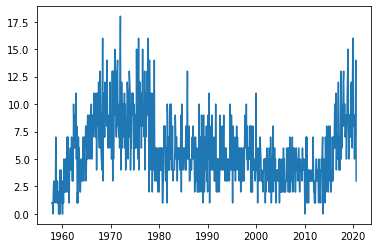

In [ ]:
plt.plot(month_to_month2.index,
         month_to_month2['Detail'])

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
new_df['Month'] = new_df['Date'].dt.month

In [ ]:
launch_by_month = new_df.groupby('Month', as_index=False).agg({'Detail':pd.Series.count})

In [ ]:
px.bar(x = launch_by_month['Month'],
       y = launch_by_month['Detail'])

In [ ]:
new_df['Month'].value_counts()

12    450
6     402
4     383
10    381
8     373
9     365
3     353
7     351
2     336
11    336
5     326
1     268
Name: Month, dtype: int64

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [ ]:
price_df = new_df[['Date', 'Price']]
price_df = price_df.resample('M', on='Date').mean()
price_df.sort_values('Price', ascending=False)

,Price
Date,
1989-10-31 00:00:00+00:00,450.00
1992-05-31 00:00:00+00:00,450.00
1992-03-31 00:00:00+00:00,450.00
1992-01-31 00:00:00+00:00,450.00
1991-11-30 00:00:00+00:00,450.00
...,...
2009-12-31 00:00:00+00:00,NaN
2010-01-31 00:00:00+00:00,NaN
2012-01-31 00:00:00+00:00,NaN


(0.0, 1000.0)

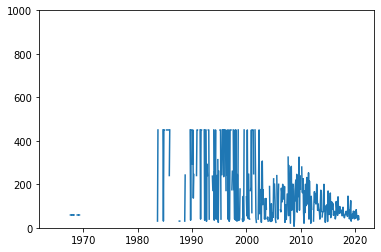

In [ ]:
plt.plot(price_df.index,
         price_df.values)
plt.ylim(0,1000)

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [ ]:
top_10_org = new_df.groupby('Organisation', as_index=False).agg({'Detail':pd.Series.count})

In [ ]:
top_10_org = top_10_org.sort_values('Detail', ascending=False)[:10]

In [ ]:
top_10_org

,Organisation,Detail
40,RVSN USSR,1777
3,Arianespace,279
17,General Dynamics,251
7,CASC,251
35,NASA,203
52,VKS RF,201
49,US Air Force,161
48,ULA,140
6,Boeing,136
34,Martin Marietta,114


# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [ ]:
cold_war_df = new_df[new_df['Year'] < 1991]
usa_vs_ussr = cold_war_df[(cold_war_df['Country']=='USA') | (cold_war_df['Country']=='Russian Federation')]
usa_vs_ussr

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_Code,Year,Year2,Month_Year,Month
1776,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia",1990-12-22 07:28:00+00:00,Tsyklon-3 | Cosmos 2114 to 2119,StatusRetired,NaN,Success,Russian Federation,RUS,1990,1990,1990-12,12
1777,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1990-12-10 07:54:00+00:00,Cosmos-3M (11K65M) | Cosmos 2112,StatusRetired,NaN,Success,Russian Federation,RUS,1990,1990,1990-12,12
1779,NASA,"LC-39B, Kennedy Space Center, Florida, USA",1990-12-02 06:49:00+00:00,Space Shuttle Columbia | STS-35,StatusRetired,450.00,Success,USA,USA,1990,1990,1990-12,12
1780,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1990-12-01 15:57:00+00:00,Atlas-E/F Star-37S-ISS | DMSP F-10,StatusRetired,NaN,Success,USA,USA,1990,1990,1990-12,12
1781,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia",1990-11-28 00:00:00+00:00,Tsyklon-3 | Cosmos 2106,StatusRetired,NaN,Success,Russian Federation,RUS,1990,1990,1990-11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4317,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-03-17 12:15:00+00:00,Vanguard | Vanguard 1,StatusRetired,NaN,Success,USA,USA,1958,1958,1958-03,3
4318,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-03-05 18:27:00+00:00,Juno I | Explorer 2,StatusRetired,NaN,Failure,USA,USA,1958,1958,1958-03,3
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,1958,1958,1958-02,2
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA,1958,1958,1958-02,2


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [ ]:
num_ussr_usa = usa_vs_ussr['Country'].value_counts()

In [ ]:
px.pie(num_ussr_usa,
       names = num_ussr_usa.index,
       values = num_ussr_usa.values,
       hole = 0.5)

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
ussr_usa_yearly = usa_vs_ussr.groupby(['Year','Country'], as_index=False).agg({'Detail':pd.Series.count})

In [ ]:
px.line(x = ussr_usa_yearly['Year'],
        y = ussr_usa_yearly['Detail'],
        color = ussr_usa_yearly['Country'])

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
new_df['Mission_Status'].value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [ ]:
failed_mission = new_df[new_df['Mission_Status'] != 'Success']
failed_mission = failed_mission.groupby('Year', as_index=False).agg({'Detail':pd.Series.count})


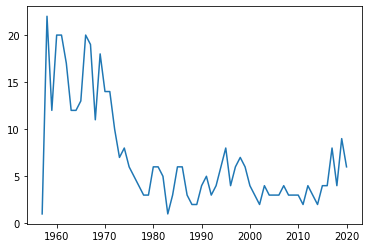

In [ ]:
plt.plot(failed_mission['Year'], failed_mission['Detail'])

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [ ]:
new_df['Success_or_Not'] = np.where(new_df['Mission_Status']=='Success', 0, 1)

In [ ]:
failure_pct = new_df.groupby('Year', as_index=False).agg({'Success_or_Not': pd.Series.mean})

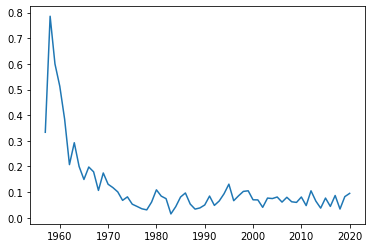

In [ ]:
plt.plot(failure_pct['Year'],
         failure_pct['Success_or_Not'])

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [ ]:
country_yearly = new_df.groupby(['Year', 'Country'], as_index=False).agg({'Detail':pd.Series.count})

In [ ]:
country_yearly

,Year,Country,Detail
0,1957,Kazakhstan,2
1,1957,USA,1
2,1958,Kazakhstan,5
3,1958,USA,23
4,1959,Kazakhstan,4
...,...,...,...
407,2020,Japan,3
408,2020,Kazakhstan,6
409,2020,New Zealand,3
410,2020,Russian Federation,3


In [ ]:
px.line(x = country_yearly['Year'],
        y = country_yearly['Detail'],
        color = country_yearly['Country'])

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [ ]:
org_yearly = new_df.groupby(['Year','Organisation'], as_index=False).agg({'Detail':pd.Series.count})

In [ ]:
px.line(x = org_yearly['Year'],
        y = org_yearly['Detail'],
        color = org_yearly['Organisation'],
        hover_name = org_yearly['Organisation'])